# Group Members: Sourav Ganguly (211011002), Gudepu Venkateswarlu(212011003), Jyoti(202011003)
# Date: 7-Jan-2022

# 1.
Sample n=100, 1000, 10000 points from (a) Multinomial distribution with four outcomes say {1, 2, 3, 4} with corresponding probabilities [0.2 0.4 0.3 0.1] (b) Uniform Distribution in 0 to 1. (c) Gaussian Distribution with mean 0 and variance 1. (d) Exponential Distribution with rate parameter = 0.5. Verify if the points are generated according to the respective distribution by plotting a histogram of the fraction of points in each case. Label graph properly. Use inbuilt library functions for sampling from each of the above mentioned distributions. Try to implement your code in python version > 3.0 not MatLab or C as it will help in implementing RL algorithms in your subsequent assignments

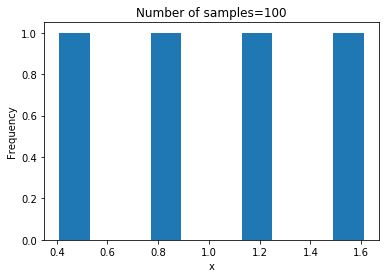

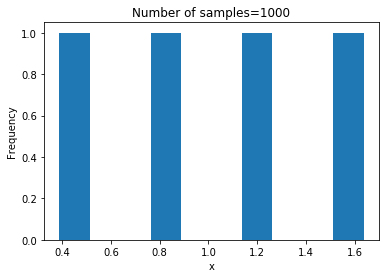

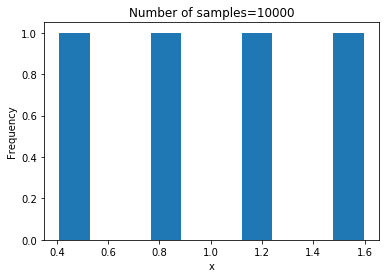

In [11]:
import numpy as np
import matplotlib.pyplot as plt
n=[100,1000,10000]
arr=np.array([0.2,0.4,0.3,0.1]);
tot=np.sum(arr);
for i in n:
    multi=np.random.multinomial(4,arr,i)
    #print(uniform)
    multi=np.mean(multi,axis=0)
    plt.figure();
    plt.hist(multi);
    plt.xlabel("x");
    plt.ylabel("Frequency");
    plt.title("Number of samples="+str(i))
plt.show();

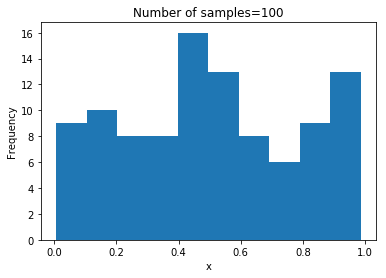

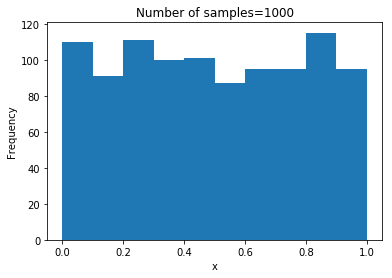

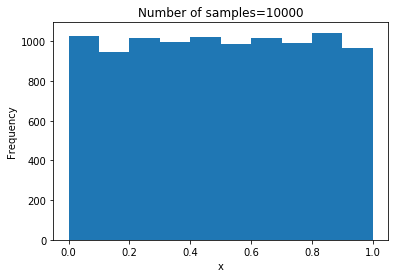

In [5]:
#Uniform between 0 and 1
n=[100,1000,10000]
for i in n:
    uniform=np.random.uniform(0,1,i)
    #print(uniform)
    plt.figure();
    plt.hist(uniform);
    plt.xlabel("x");
    plt.ylabel("Frequency");
    plt.title("Number of samples="+str(i))
plt.show();

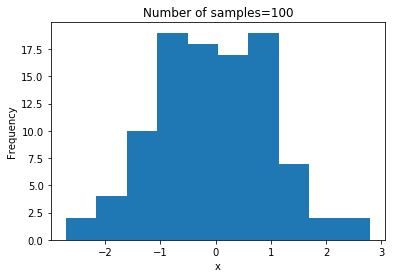

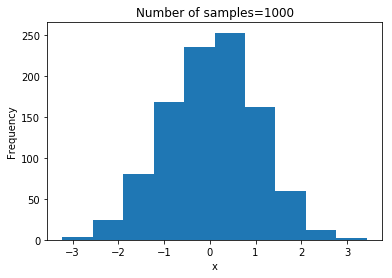

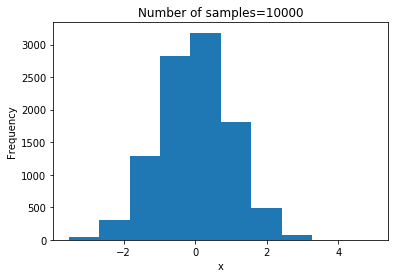

In [6]:
n=[100,1000,10000]
for i in n:
    normal=np.random.normal(0,1,i)
    #print(uniform)
    plt.figure();
    plt.hist(normal);
    plt.xlabel("x");
    plt.ylabel("Frequency");
    plt.title("Number of samples="+str(i))
plt.show();

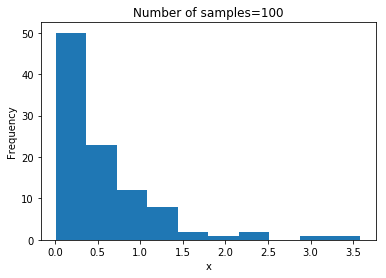

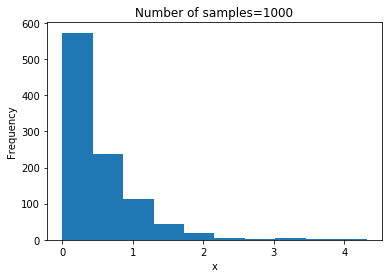

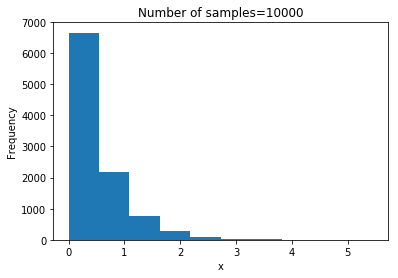

In [7]:
n=[100,1000,10000]
for i in n:
    exp=np.random.exponential(0.5,i)
    #print(uniform)
    plt.figure();
    plt.hist(exp);
    plt.xlabel("x");
    plt.ylabel("Frequency");
    plt.title("Number of samples="+str(i))
plt.show();

# 2.
Generate normal random variable samples with mean µ and variance σ 2 from uniform random variable. Here, assume you get uniform samples from the interval (0, 1) from inbuilt library functions. Verify if your method indeed generates normal random samples. Justify your procedure clearly.

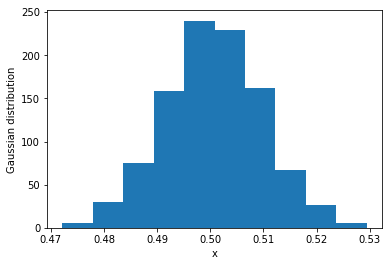

In [8]:
#Using the central limit theorem
gauss_samples=1000
n_points=1000
a,b=0,1

uniform_matrix=np.random.uniform(a,b,(gauss_samples,n_points));
gaussians=np.mean(uniform_matrix,axis=0)
plt.hist(gaussians)
plt.xlabel('x')
plt.ylabel('Gaussian distribution')
plt.show()

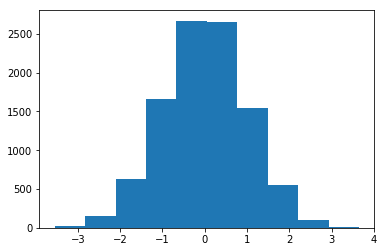

In [10]:
#Using Box-Muller Method
a,b,N=0,1,10000
x=np.random.uniform(a,b,N)
#plt.hist(x);
#plt.show();
u1,u2=x[:5000],x[5000:];
x1=np.sqrt(-2 * np.log(u1))*np.cos(2*np.pi*u2);
x2=np.sqrt(-2 * np.log(u1))*np.sin(2*np.pi*u2);
x=np.concatenate((x1,x2),axis=0)
plt.hist(x);
plt.show();

# 3.(a)
Plot the sqrt ( sin(x)) function. Find the area under the curve of sqrt ( sin(x)) in the interval (0, π) using concepts taught in class not using numerical techniques.

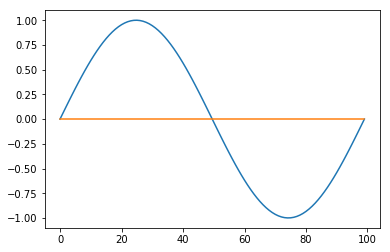

In [12]:
#checking for normal sine function
x=np.linspace(0,np.pi*2,100)
s=np.sin(x);
z=np.zeros(s.shape);
plt.plot(s)
plt.plot(z);
plt.show()

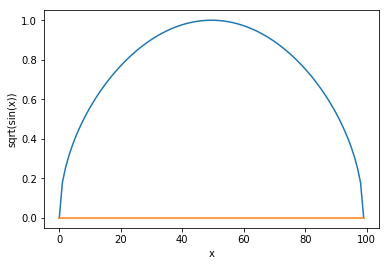

In [13]:
#Plotting the given function
x=np.linspace(0,np.pi,100)
s=np.sqrt(np.sin(x));
z=np.zeros(s.shape);
plt.plot(s)
plt.plot(z);
plt.xlabel('x');
plt.ylabel('sqrt(sin(x))')
plt.show()

In [8]:
#Calculating area with concepts taught by sir
a,b,N=0,1,10000
u=np.pi*np.random.uniform(a,b,N)
g=np.pi*np.sqrt(np.sin(u))
print(np.mean(g));

2.398255227208059


In [9]:
#Checking by analytical methods(Basics of integration)
x=np.linspace(0,np.pi,100000);
f=np.sqrt(np.sin(x));
l=len(f);
a=x[0];
h,integral=0,0
for i in range(1,l):
    b=x[i];
    h=min(h,f[i]);
    integral+=h*(b-a);
    a=b
    h=f[i];
print(integral);

2.396248980018034


# 3.(b)
Plot the sqrt ( sin(x))*exp(-(x^2)) function. Find the area under the curve of sqrt ( sin(x))*exp(-(x^2)) in the interval (0, π) using concepts taught in class not using numerical techniques.

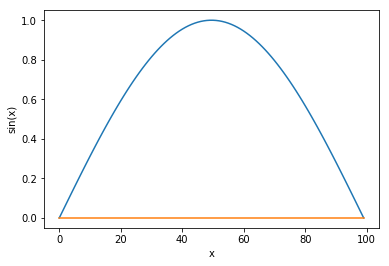

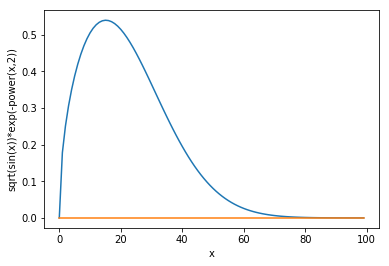

In [10]:
x=np.linspace(0,np.pi,100)
s=np.sin(x);
z=np.zeros(s.shape);
plt.plot(s)
plt.xlabel('x');
plt.ylabel('sin(x)')
plt.plot(z);
plt.show()
s_=np.sqrt(np.sin(x))*np.exp(-np.power(x,2));
z=np.zeros(s.shape);
plt.plot(s_)
plt.plot(z);
plt.xlabel('x')
plt.ylabel('sqrt(sin(x))*exp(-power(x,2))')
plt.show()

In [23]:
a,b,N=0,1,10000
##E(g(x))=integration (g(x)*f(x))
###technique 1
z=np.pi
n=np.random.uniform(a,b,N)*z;
g=np.sqrt(np.sin(n))*(np.exp(-np.power(n,2)))*z;
print(np.mean(g))
###technique 2
a,b,N=0,1/np.sqrt(2),10000
x=np.random.normal(a,b,N);
x=np.abs(x);
x=np.array([i for i in x if i>=0 and i<=z]);
g=np.sqrt(np.pi*np.sin(x));
print(np.mean(g)*(x.shape[0])/(2*N));

0.5803785639888467
0.574131338102294


In [21]:
#Using analytical technique(Basics of integration)
x=np.linspace(0,np.pi,100000);
f=np.sqrt(np.sin(x))*np.exp(-1*np.power(x,2));
#f=np.sin(x);
l=len(f);
a=x[0];
h,integral=0,0
for i in range(1,l):
    b=x[i];
    h=min(h,f[i]);
    integral+=h*(b-a);
    a=b
    h=f[i];
print(integral);

0.5748303993459218


# 4.
Consider a very peculiar game of Snakes and Ladders shown in Figure 1. The player starts with their pawn in state 0. In each step, a fair six-sided die is tossed. If the die outcome is 1, the player’s pawn can move ahead one position, if the outcome is 2, the pawn can move ahead 2 positions, and for any other outcome, the pawn has to stay in the same position. Notice that there is a snake as well as a ladder between the positions 2 and 4. Thus if the pawn visits any of these states, it will get stuck in an infinite loop and the game would never end.

(a) Represent this game as a Markov Chain and draw it clearly showing the states, transitions and their probabilities. (b) What is the probability that starting from position 0, the player ever reaches the end state? You solve this using simulations. Try to solve it analytically as well and cross check.

In [13]:
N=9;
T = np.zeros((N, N))
T=[[2/3.,1/6.,1/6.,0,0,0,0,0,0],
   [0,2/3.,1/6.,1/6.,0,0,0,0,0],
   [0,0,2/3.,1/6.,1/6.,0,0,0,0],
   [0,0,0,2/3.,1/6.,1/6.,0,0,0],
   [0,0,0,0,2/3.,1/6.,1/6.,0,0],
   [0,0,0,0,0,2/3.,1/6.,1/6.,0],
   [0,0,0,0,0,0,2/3.,1/6.,1/6.],
   [0,0,0,0,0,0,0,5/6.,1/6.],
   [0,0,0,0,0,0,0,0,1]]
T=np.array(T);
print('Final',T)

Final [[0.66666667 0.16666667 0.16666667 0.         0.         0.
  0.         0.         0.        ]
 [0.         0.66666667 0.16666667 0.16666667 0.         0.
  0.         0.         0.        ]
 [0.         0.         0.66666667 0.16666667 0.16666667 0.
  0.         0.         0.        ]
 [0.         0.         0.         0.66666667 0.16666667 0.16666667
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.66666667 0.16666667
  0.16666667 0.         0.        ]
 [0.         0.         0.         0.         0.         0.66666667
  0.16666667 0.16666667 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.66666667 0.16666667 0.16666667]
 [0.         0.         0.         0.         0.         0.
  0.         0.83333333 0.16666667]
 [0.         0.         0.         0.         0.         0.
  0.         0.         1.        ]]


In [14]:
v = np.zeros(N)
v[0] = 1

n, P = 0, []
prob = 0

In [15]:
flag=0;
while n<100:
    n += 1
    v = v.dot(T)
    P.append(v[N-1])
    prob=v[N-1];
    if(prob>=0.999 and flag==0):
        moves=n;
        flag=1;
moves=moves+1;
print('Maximum probability that our pawn will move to final position and the minimum number of moves required to almost approach stability:', np.max(P),moves)


Maximum probability that our pawn will move to final position and the minimum number of moves required to almost approach stability: 0.9999997464323587 56


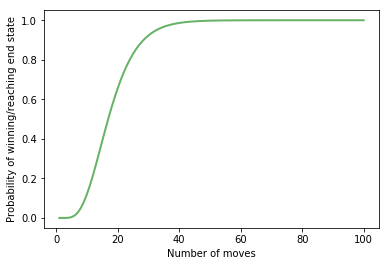

In [16]:
plt.plot(np.linspace(1,n,n), P, 'g', lw=2, alpha=0.6)
plt.xlabel('Number of moves')
plt.ylabel('Probability of winning/reaching end state')

plt.show()

# Alternative way
Playing the game as is decided. So in this way, we play the game by taking the role of dice as a random choice. Based on the choice we see where my agent(pawn) ends up considering 2,4 and 8 as my ending states. Now if it ends up at 8, we actually declare him winner and increase a counter. And if we lands in any of the unwanted states, he is declared to regret. Since, our algo converges, so we can do this for 'N' number of times and get some output surely. The probability of win is number of times the pawn lands on the state 8/N.

Probability that our pawn will end in the end state(state 8): 0.12406
Probability that the pawn will end up in state 2 or state 4: 0.87594


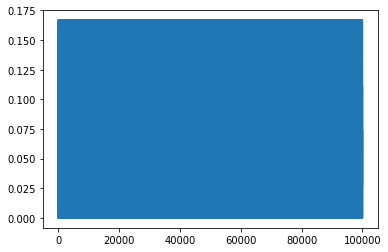

In [19]:
n,N = 0,100000
prob = 0
rew,reg=0,0;
f_prob=[];
while n<N:
    state=0;
    prob=1;
    run=True;
    n+=1;
    while run!=False:
        if(state==8):
            rew+=1;
            break;
        elif(state==2 or state==4):
            reg+=1;
            break;
        choice=np.random.randint(6)+1;
        if(choice==1):
            prob*=T[state][state+1];
            state+=1;
        elif(choice==2 and state==7):
            prob*=T[state][state];
        elif(choice==2):
            prob*=T[state][state+2];
            state+=2;
        else:
            prob*=T[state][state];
    f_prob.append(prob);
succ,failure=rew/N,reg/N;
print("Probability that our pawn will end in the end state(state 8):",succ);
print("Probability that the pawn will end up in state 2 or state 4:",failure);
plt.plot(np.arange(len(f_prob)),f_prob);
plt.show();